# **BUSI 488 / COMP 488 Data Science in the Business World**
## *Spring 2023*  
Daniel M. Ringel

Kenan-Flagler Business School

*The University of North Carolina at Chapel Hill*  
dmr@unc.edu

## Class 10 - **Competitive Analysis:** Who Competes with Whom in the U.S. Digital Space?
*February 9, 2023*  
Version 1.4



# Today's Agenda

1. **Unstructured Data**
2. **Competitors from 10-K Filings**
3. **Class Project Setup**
4. **Top 100 Digital Firms 2019**
5. **Compustat Data**
6. **TNIC Data**
7. **Merging Datasets**
8. **Construct U.S. Digital Sector 2019**
9. **Competitive Relationships**
10. **Preprocessing of Firm Data**
11. **Submarket Detection**
12. **Interactive Competitive Market Structure Map**



## Prep-Check:
- **Reviewed** Python Notebooks on Cluster Analysis (Class07) and Dimensionality Reduction (Class08)
- **Started** Team Assignment 2
- **Read**: Matthe, Maximilian, Daniel M. Ringel, and Bernd Skiera, 2022. [Mapping Market Structure Evolution](https://pubsonline.informs.org/doi/abs/10.1287/mksc.2022.1385). Marketing Science.

# Today's Marketing Problem: Who Competes with Whom?
![Competition](https://www.theglobeandmail.com/resizer/4XTiylwbqWhIHg8Whm5mFESwnH4=/1900x0/filters:quality(80)/arc-anglerfish-tgam-prod-tgam.s3.amazonaws.com/public/J6ZXLYM545EPXB3D5GK6KI7UBI)

### **Competitive Market Structure Analysis**

- To develop ***effective competitive strategies***, firms must first have a clear ***understanding*** of the competitive environment they operate in (e.g., Rao and Sabavala 1986).  

- Understanding competitive market structure is ***at the heart of strategic management decisions*** in general (DeSarbo, Grewal, and Wind 2006, and ***marketing decisions*** in particular (Carpenter and Lehmann 1985).   

- There is perhaps no ***marketing mix decision*** that does not require an understanding of relevant competitive interrelationships (Lattin and McAlister 1985). 


***Market Perspective*** 
- Firms' perspectives
- Consumers' perspectives
- Regulators' perspectives

***Market Boundaries*** 
- By Firms
- By Products
- By Consumers
- By Geography
- Other?

***Market Definitions***
- Geography
- Product Categories
- Industries
- Other?

### **What about the Digital Sector?**
- Arguably important!
- *Challenge:* How to define?
- [Forbes Magazine](https://www.forbes.com/top-digital-companies/list/2/) : Top 100 Digital Companies

---- 
   
#### **Today's Class Project**: Use a less conventional data source, namely firms' 10-K SEC filings, to analyze competition in the U.S. Digital Sector.
----



# 1 Unstructured Data
- So far, we used structured data for our analyses
- Most data today are unstructured  

![Unstructured Data](https://s7280.pcdn.co/wp-content/uploads/2015/09/DB2_Unstructured_Data_700x400.jpg)


### **Definition**:   
Unstructured data can be defined as a single data unit that offers a relatively concurrent representation of its multifaceted nature without any predefined organization or numeric values (Balducci and Marinova 2018).  

## 1.1 Data Types and Data Sources

![Data Sources and Data Types](https://mapxp.app/BUSI488/datatypesource-small-2.jpg "Data Sources and Data Types")


## 1.2 Unstructured Data from Entity Interaction

![Data Sources for Text Analysis](https://mapxp.app/BUSI488/DataSource-Text-Analysis-2.jpg "Data Sources for Text Analysis")



# 2 Identifying Competitors from 10-K SEC Filings

- FORM 10-K contains a firm's business description and *information about the products and services* it offers 
- Descriptions are unstructured textual data 
- Text not confined within the boundaries and structures of classic industry definitions

###***Idea***: 
- *Firms that describe their products and services in a very similar way are more likely competitors than firms with very different descriptions.*
- Study 10-K descriptions of Forbes Top 100 Digital Companies

## 2.1 Example: Apple's 2019 10-K 

![Apple 10K 2019](https://mapxp.app/BUSI488/Appl10K2019.png)
*Source:* https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/a10-k20199282019.htm#s8FA93AA667C0535398014FA54B397439

## 2.2 TNIC: Text-based Network Industry Classifications

* Industry classifications based on ***firms' pairwise similarity scores*** from text analysis of firms' 10-K product descriptions. 
* Competitors are firm centric with each firm having its own distinct set of competitors - analogous to networks or a "Facebook" circle of friends. 
* Updated annually and offer more research flexibility, and are also more informative, than FIC (fixed industry) classifications such as SIC, NAICS, and the 10-K based FIC classifications.
* TNIC data were shown to improve upon SIC and NAICS codes in explaining many different firm specific decisions, including firm profitability, Tobin's Q and dividends. 

*Source:* [Real and Financial Industry Booms and Busts.](http://papers.ssrn.com/sol3/papers.cfm?abstract_id=1109124)
Gerard Hoberg and Gordon Phillips, 2010, Journal of Finance 65 (1), 45-86. 


# 3 Class Project Setup

**We will use three datasets to study competitive market structure in the 2019 U.S. Digital Sector**

1. Top 100 Digital Firms in 2019 by Forbes
2. Compustat (firm information such as name and financial KPIs)
3. TNIC (edgelists of pairwise similarities among firms)

In [1]:
# 1. Connect your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/488/Class10
!ls # special shell command to view the files in the home directory of the notebook environment

Mounted at /content/gdrive
/content/gdrive/MyDrive/488/Class10
488_2023_Class10.ipynb	tnic2_data_2019.txt
computstat2019.csv	Top100-Digital-2019-Forbes-GVKEY.csv


In [2]:
# On your local computer, you need to run the following from your terminal / anaconda prompt
# pip3 install networkx
# pip3 install python-louvain # install from terminal - might not work from notebook

In [6]:
# 2. Required imports:
import pandas as pd
import numpy as np
import random
from scipy.sparse import coo_matrix
import networkx as nx
from community import community_louvain
from sklearn.manifold import TSNE
import seaborn as sns
import altair as alt

# 4 Top 100 Digital Firms 2019 (Forbes)
https://www.forbes.com/top-digital-companies/list/2/

In [7]:
# I manually matched all Top 100 Digital firms to their Compustat gvkey for you.
# Note that not all Top 100 Digital firms are in the Compustat database. Why? 

# 1. Read Firm-gvkey-map
Top100D = pd.read_csv('Top100-Digital-2019-Forbes-GVKEY.csv')

# 2. Let's take a look
Top100D

,gvkey,name,firm
0,1690,APPLE INC,Apple Inc
1,12141,MICROSOFT CORP,Microsoft
2,160329,ALPHABET INC,Alphabet
3,9899,AT&T INC,AT&T Inc
4,64768,AMAZON.COM INC,Amazon
...,...,...,...
73,23671,NOKIA CORP,Nokia
74,26590,FORTIVE CORP,Fortive
75,12635,FISERV INC,Fiserv
76,18467,FUJITSU LTD,Fujitsu


# 5 Compustat Data

- Compustat, published by Standard and Poor's since 1962, is a widely used financial database and information provider.
- The service covers thousands of companies worldwide across hundreds of markets.
- With information dating as far back as 1950, Compustat is a leading source of intelligence for financial market professionals, investors, and academics 

*Source:* https://www.investopedia.com/terms/c/compustat.asp

We will only use an small excerpt from Compustat's database from Wharton Research Data Services: https://wrds-www.wharton.upenn.edu/ 

In [8]:
# 1. Read Compustat data 
df_compustat = pd.read_csv('computstat2019.csv')
display(df_compustat)
display(len(df_compustat))

,gvkey,year,name,ebit,mkvalt,sic,capx,ni,ibc,dp,at,dltt,dlc,seq,xrd,icapt,sale,sic2
0,1045,2019,AMERICAN AIRLINES GROUP INC,3706.000,12280.8620,4512,4268.000,1686.000,1686.000,2318.000,59995.000,28875.000,4569.000,-118.000,NaN,28757.000,45768.000,45
1,1050,2019,CECO ENVIRONMENTAL CORP,19.622,269.1494,3564,5.655,17.707,17.707,10.609,408.637,81.457,5.626,193.017,NaN,274.474,341.869,35
2,1062,2019,ASA GOLD AND PRECIOUS METALS,NaN,235.3380,6799,NaN,NaN,NaN,0.000,286.612,0.000,0.000,285.879,NaN,285.879,NaN,67
3,1062,2019,ASA GOLD AND PRECIOUS METALS,-1.173,235.3380,6799,NaN,91.431,NaN,0.000,286.612,0.000,0.000,285.879,NaN,285.879,2.371,67
4,1075,2019,PINNACLE WEST CAPITAL CORP,671.960,10111.3695,4911,1209.975,538.320,557.813,590.929,18479.247,4884.430,927.388,5430.648,NaN,10437.618,3471.209,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,330227,2019,CASTOR MARITIME INC,1.284,6.1383,4412,17.227,1.088,1.088,0.556,30.421,14.234,1.523,13.204,NaN,27.438,5.968,44
10866,330942,2019,JPMORGAN BTBULDRS US EQU ETF,NaN,NaN,6722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
10867,331856,2019,IMMUNIC INC,-26.332,104.2265,2836,0.055,-34.933,-34.933,0.050,65.955,0.520,0.000,58.363,22.512,58.883,0.000,28
10868,332115,2019,ARMATA PHARMACEUTICALS INC,-17.989,32.2498,2836,0.224,-19.479,-19.479,1.351,25.451,1.555,1.308,14.593,9.824,16.148,0.000,28


10870

Some relevant Compustat variables: 
- gvkey:    unique firm identifier (match to TNIC data)
- fyear:    fiscal year end (match to TNIC data)
- conm:     company name
- ebit:     EBIT (Earnings Before Interest and Taxes)
- mkvalt:   Market Value 
- capex:    Capitial Expenditures
- ni:       Net Income
- (ibc+dp)/at          cashflow
- (dltt+dlc)/seq   Leverage
- xrd/at  R&D Intensity
- ni/icapt. ROI
- sale  sales revenue

## 5.1 Select a Financial Year for Analysis

In [19]:
# 1. Define which year
syear=2019

# 2. Keep only records of selected financial year
df_compustat = df_compustat[df_compustat['year'] == syear]

In [20]:
# 3. Take a look
df_compustat

,gvkey,year,name,ebit,mkvalt,sic,capx,ni,ibc,dp,...,dlc,seq,xrd,icapt,sale,sic2,cashflow,liquidity,RD_Intensity,ROI
0,1045,2019,AMERICAN AIRLINES GROUP INC,3706.000,12280.8620,4512,4268.000,1686.000,1686.000,2318.000,...,4569.000,-118.000,NaN,28757.000,45768.000,45,0.066739,-283.423729,NaN,0.058629
1,1050,2019,CECO ENVIRONMENTAL CORP,19.622,269.1494,3564,5.655,17.707,17.707,10.609,...,5.626,193.017,NaN,274.474,341.869,35,0.069294,0.451168,NaN,0.064512
2,1062,2019,ASA GOLD AND PRECIOUS METALS,-1.173,235.3380,6799,NaN,91.431,NaN,0.000,...,0.000,285.879,NaN,285.879,2.371,67,NaN,0.000000,NaN,0.319824
4,1075,2019,PINNACLE WEST CAPITAL CORP,671.960,10111.3695,4911,1209.975,538.320,557.813,590.929,...,927.388,5430.648,NaN,10437.618,3471.209,49,0.062164,1.070189,NaN,0.051575
5,1076,2019,AARON'S INC,313.931,3810.2650,7359,92.963,31.472,31.472,2077.419,...,83.886,1737.259,NaN,2363.789,3947.656,73,0.639484,0.408929,NaN,0.013314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,330227,2019,CASTOR MARITIME INC,1.284,6.1383,4412,17.227,1.088,1.088,0.556,...,1.523,13.204,NaN,27.438,5.968,44,0.054042,1.193350,NaN,0.039653
10866,330942,2019,JPMORGAN BTBULDRS US EQU ETF,NaN,NaN,6722,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,67,NaN,NaN,NaN,NaN
10867,331856,2019,IMMUNIC INC,-26.332,104.2265,2836,0.055,-34.933,-34.933,0.050,...,0.000,58.363,22.512,58.883,0.000,28,-0.528891,0.008910,0.341324,-0.593261
10868,332115,2019,ARMATA PHARMACEUTICALS INC,-17.989,32.2498,2836,0.224,-19.479,-19.479,1.351,...,1.308,14.593,9.824,16.148,0.000,28,-0.712271,0.196190,0.385997,-1.206279


## 5.2 Fill-in missing data from duplicates and remove duplicate entries
Compustat data include duplicate entries for some gvkey-year combinations. We leverage these to create a complete set of variables (KPIs) for our analysis by forward and backfilling missing data per variable.

In [21]:
%%time
# 1. Replace missing data where available from other observations (i.e., instances) using forward fill and back fill imputation
df_compustat=df_compustat.groupby(['gvkey', 'year']).apply(lambda x: x.fillna(method='ffill'))
df_compustat=df_compustat.groupby(['gvkey', 'year']).apply(lambda x: x.fillna(method='bfill'))

CPU times: user 21.3 s, sys: 444 ms, total: 21.7 s
Wall time: 27.5 s


In [22]:
# 2. Remove duplicates
display('Rows with duplicates: ' + str(len(df_compustat)))
df_compustat = df_compustat.drop_duplicates(['gvkey', 'year'])
display('Rows without duplicates: ' + str(len(df_compustat)))

'Rows with duplicates: 9900'

'Rows without duplicates: 9900'

## 5.3 Calculate Financial KPIs and create Dataframe that holds Firms' financials

In [23]:
df_compustat['cashflow']=((df_compustat['ibc'].astype(float) + df_compustat['dp'].astype(float))/df_compustat['at'].astype(float))
df_compustat['liquidity']=((df_compustat['dltt'].astype(float) + df_compustat['dlc'].astype(float))/df_compustat['seq'].astype(float))
df_compustat['RD_Intensity']=df_compustat['xrd'].astype(float)/df_compustat['at'].astype(float)
df_compustat['ROI']=df_compustat['ni'].astype(float)/df_compustat['icapt'].astype(float)

In [24]:
Financials=df_compustat[['gvkey','year','name','sic','sic2','ebit','ni','capx','mkvalt','sale','cashflow','liquidity','RD_Intensity','ROI']].copy()
Financials

,gvkey,year,name,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI
0,1045,2019,AMERICAN AIRLINES GROUP INC,4512,45,3706.000,1686.000,4268.000,12280.8620,45768.000,0.066739,-283.423729,NaN,0.058629
1,1050,2019,CECO ENVIRONMENTAL CORP,3564,35,19.622,17.707,5.655,269.1494,341.869,0.069294,0.451168,NaN,0.064512
2,1062,2019,ASA GOLD AND PRECIOUS METALS,6799,67,-1.173,91.431,NaN,235.3380,2.371,NaN,0.000000,NaN,0.319824
4,1075,2019,PINNACLE WEST CAPITAL CORP,4911,49,671.960,538.320,1209.975,10111.3695,3471.209,0.062164,1.070189,NaN,0.051575
5,1076,2019,AARON'S INC,7359,73,313.931,31.472,92.963,3810.2650,3947.656,0.639484,0.408929,NaN,0.013314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10865,330227,2019,CASTOR MARITIME INC,4412,44,1.284,1.088,17.227,6.1383,5.968,0.054042,1.193350,NaN,0.039653
10866,330942,2019,JPMORGAN BTBULDRS US EQU ETF,6722,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10867,331856,2019,IMMUNIC INC,2836,28,-26.332,-34.933,0.055,104.2265,0.000,-0.528891,0.008910,0.341324,-0.593261
10868,332115,2019,ARMATA PHARMACEUTICALS INC,2836,28,-17.989,-19.479,0.224,32.2498,0.000,-0.712271,0.196190,0.385997,-1.206279


# 6 TNIC Data

- Data represent an edgelist of pairwise similarities among firms within a given year.  

- Firms are indicated by Compustat's ***gvkey*** identifier.   

- ***Score*** is a similarity measure for all firms in data set.   

- Note that **not all pairs of firms have a score**, but only those for which the similarity exceeds a certain threshold (details are described in the Hoberg & Philips article). 

*The full TNIC data are available here:*
http://hobergphillips.tuck.dartmouth.edu/

In [15]:
# 1. Read TNIC data and select data for financial year 2019
df_tnic = pd.read_csv("tnic2_data_2019.txt", sep = '\t')

# 2. Keep only 2019 Data and drop missing data
df_tnic = df_tnic[df_tnic['year'] == syear].dropna()

# 3. Remove scores of zero
df_tnic = df_tnic[df_tnic.score>0]

# 4. Show data
df_tnic

,year,gvkey1,gvkey2,score
0,2019,1004,1210,0.0284
1,2019,1004,1300,0.0050
2,2019,1004,1823,0.0291
3,2019,1004,2285,0.0180
4,2019,1004,2577,0.0150
...,...,...,...,...
1049339,2019,332115,292043,0.1651
1049340,2019,332115,293919,0.1877
1049341,2019,332115,294007,0.1658
1049342,2019,332115,318728,0.0198


#7 Merge TNIC Data with Compustat Firm Financials

TNIC Data do not include:

1. Firm Names
2. Details about Firm Performance

This information is available in the Compustat data. 

***We need to merge both datasets.***

In [16]:
# 1. Merge 'gvkey1' to 'name1'
df_tnic = df_tnic.merge(Financials[['year', 'gvkey', 'name']], how = 'left', left_on = ['year', 'gvkey1'], right_on = ['year', 'gvkey'])
df_tnic = df_tnic.rename(columns = {'name': 'name1'})

# 2. Merge 'gvkey2' to 'name2'
df_tnic = df_tnic.merge(Financials, how = 'left', left_on = ['year', 'gvkey2'], right_on = ['year', 'gvkey'])
df_tnic = df_tnic.rename(columns = {'name': 'name2'})
df_tnic = df_tnic.drop(['gvkey_x', 'gvkey_y'], axis = 1).dropna()

# 3. Make sure SIC codes are available
df_tnic['sic'] = df_tnic['sic'].fillna(0).astype(int)
df_tnic['sic2'] = df_tnic['sic'].fillna(0).astype(int)

# 4. See product peers for a given firm (e.g., Amazon)
df_tnic[df_tnic['gvkey1']==64768]

,year,gvkey1,gvkey2,score,name1,name2,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI
731492,2019,64768,6733,0.0017,AMAZON.COM INC,L BRANDS INC,5600,5600,978.000,-366.000,458.000,6.415320e+03,12914.000,0.021926,-6.070047,0.000000,-0.051863
731494,2019,64768,12141,0.0030,AMAZON.COM INC,MICROSOFT CORP,7372,7372,42959.000,39240.000,13925.000,1.023856e+06,125843.000,0.177417,0.844865,0.058893,0.216273
731495,2019,64768,12421,0.0219,AMAZON.COM INC,TRANS WORLD ENTMT CORP,5735,5735,-57.109,-58.744,2.823,6.283400e+00,325.935,-0.554884,7.956146,0.000000,-3.304309
731497,2019,64768,23856,0.0004,AMAZON.COM INC,FITBIT INC,3663,3663,-270.265,-320.711,36.531,1.740281e+03,1434.788,-0.188492,0.190445,0.219543,-0.577686
731499,2019,64768,121673,0.0051,AMAZON.COM INC,STAMPS.COM INC,7370,7370,93.563,59.229,2.256,1.422262e+03,571.850,0.096507,0.105124,0.086472,0.087125
731501,2019,64768,163884,0.0008,AMAZON.COM INC,FRANKLIN STREET PROPERTIES,6798,6798,43.501,6.475,0.000,9.182226e+02,269.065,0.052850,1.229200,0.000000,0.003694
731502,2019,64768,176782,0.0071,AMAZON.COM INC,GLU MOBILE INC,7372,7372,8.250,8.871,5.283,8.940569e+02,411.381,0.041820,0.201288,0.227550,0.036895
731504,2019,64768,187959,0.0001,AMAZON.COM INC,BRIGHTCOVE INC,7370,7370,-8.864,-21.903,7.279,3.381105e+02,184.455,-0.077985,0.241153,0.188208,-0.255208


In [17]:
# 1. Check time period
years = df_tnic['year'].unique()
years = np.sort(years)
display("Time period available:  [" + str(np.min(years)) + " , " + str(np.max(years)) + "]")

# 2. Check number of relationships in data set
display("Relationships: " + str(len(df_tnic)))

'Time period available:  [2019 , 2019]'

'Relationships: 545904'

# 8 Construct Sample for U.S. Digital Sector 2019

We want to study the Digital Sector in the U.S., which likely consists of more firms than just the Top 100 Digital Firms that Forbes identified. Since the digital sector is not identified by unique SIC codes, we take a different approach to expand the set of firms on our analysis.  

- Use digital firms (as identified by Forbes) as "seeds"
- Identify 10 most similar firms (by TNIC score) for each seed (i.e., leader) and add to sample

## 8.1  Support Function to Sample Firms

In [25]:
def build_sample(df, leaders, n_competitors, year):
    """ Build a sample of firms within a given year based on list of leaders and their top n competitors and add them to the sample. 

    Arguments: 
        df {dataframe} -- TNIC dataframe
        leader -- list of firms whose n-closest competitors we want
        year {int} -- year
        n_competitors {int} -- Number of competitors, included for each seed firm (i.e., leader).
    
    Returns: 
        {list} -- list of company names""" 
        
    name_list = df[df['year']==year]['name1']

    names = []
    names.extend(leaders)
    for leader in leaders: 
        competitors = df[(df['name1'] == leader) & (df['year']==year)].sort_values(
            'score', ascending = False)['name2']
        competitors = competitors[:np.minimum(n_competitors, len(competitors))]
        names.extend(competitors)

    # Remove duplicate entries (expect that many firms will have same competitors - i.e., competitors overlap)
    names = list(set(names))
    return names

## 8.2 Build U.S. Digital Sector Sample

In [26]:
%%time
# 1. Get unique names in Top 100 and in TNIC data
DigitalLeaders = Top100D['name'].unique().tolist()
tnic_names=list(set(df_tnic.name1.unique().tolist() + df_tnic.name2.unique().tolist()))

# 2. Build Sample (select top 10 competitors of each of our Top 100 companies)
competitors = 10
names = build_sample(df_tnic, list(set(tnic_names).intersection(DigitalLeaders)), n_competitors = competitors,  year = syear)
names = [name for name in names if not pd.isna(name)]
print(f"We define the U.S. Digital Sector 2019 through {len(names)} firms")

We define the U.S. Digital Sector 2019 through 247 firms
CPU times: user 1.69 s, sys: 17.2 ms, total: 1.71 s
Wall time: 1.73 s


# 9 Generate U.S. Digital Sector Relationship Matrix

We now organize all firm's relationships into a symmetric relationship matrix where the intersection of a row and a column captures the similarity of the corresponding firms.

In [27]:
# 1. Import required method from scipy
from scipy.sparse import coo_matrix

# 2. Define a function that generates a similarity matrix from a list of pairwise relationships (i.e., edge list)
def create_similarity_matrix_fast(df, names):
    """ Turn edgelist from TNIC data into a similarity matrix. 

    Arguments: 
        df {dataframe} -- TNIC dataframe
        names {list} -- list of company names (strings)
    
    Returns:
        {np.array} -- similarity matrix (symmetric, non-negative)
    """     
    n = len(names)
    
    df = df[(df['name1'].isin(names)) & (df['name2'].isin(names))]
    row = [names.index(name) for name in df['name1']]
    col = [names.index(name) for name in df['name2']]

    scores = list(df['score'])

    sim_mat = coo_matrix((scores, (row, col)), shape=(n, n))
    sim_mat = sim_mat.toarray()
    sim_mat = np.nan_to_num(sim_mat, 0)
    return sim_mat

In [28]:
%%time
# 3. Generate Relationship Matrix for U.S. Digital Sector 2019
sim_mat = create_similarity_matrix_fast(df_tnic, names)

# 4. Let's see what it looks like
display(sim_mat[0:8,0:8])

array([[0.    , 0.    , 0.0445, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.028 , 0.    , 0.    , 0.0414, 0.    ],
       [0.0445, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.028 , 0.    , 0.    , 0.    , 0.    , 0.0182, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.0387, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.0387, 0.    , 0.    , 0.    ],
       [0.    , 0.0414, 0.    , 0.0182, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]])

CPU times: user 187 ms, sys: 2.67 ms, total: 190 ms
Wall time: 223 ms


## 9.1 Largest Connected Component
There is a chance that we have multiple connected components.

In graph theory, a component of an undirected graph is an induced subgraph in which:
- any two vertices are connected to each other by paths
- and which is connected to no additional vertices in the rest of the graph

![Connected Components](https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Pseudoforest.svg/480px-Pseudoforest.svg.png)

We confine our analysis to the largest connected component in the U.S. Digital Sector 2019

In [29]:
# 1. Import required package
import networkx as nx

# 2. Check number of firms in our sample
print(f"Sample contains {len(names)} firms")

# 3. Generate connected components and select the largest:
G = nx.from_numpy_array(sim_mat)
names = [names[i] for i in list(max(nx.connected_components(G), key=len))]

# 4. Re-create sim-mat for largest connected component
sim_mat = create_similarity_matrix_fast(df_tnic, names)
print(f"The largest connected component consists of {len(names)} firms")

Sample contains 247 firms
The largest connected component consists of 247 firms


## 9.2 Minimum Relationship Threshold
We only want to consider firms that play at least some role (in terms of being similar to other firms) in our analysis of the U.S. Digital Sector 2019. 

We therefore remove all firms from our analysis that have less than 5 relationships (to other firms)

In [30]:
# 1. Define minimum number of relationships for a firm to be included in our sample
REL = 10

# 2. Keep only firms that have at least REL relationships
names = [ j for (i,j) in zip(np.sum(np.where(sim_mat > 0, 1, sim_mat), axis=1),names) if i >= REL]
print(f'Number of firms that meet threshold: {len(names)}')

# 3. Re-create sim-mat
sim_mat = create_similarity_matrix_fast(df_tnic, names)

# 4. Generate connected components and select the largest:
G = nx.from_numpy_array(sim_mat)
names = [names[i] for i in list(max(nx.connected_components(G), key=len))] 
print(f'The largest connected component consists of {len(names)} firms')

# 5. Check if firms with less than REL relationships are still in the data
check = min(np.sum(np.where(sim_mat > 0, 1, sim_mat), axis=1))< REL
print(f'Sample contains Firms that fall short of threshold: {check}\n')

# 6. Because the above removal of any given firm can lead to other firms no longer having REL relationships, 
#    we remove firms in an iterative process using a while loop as follows:

while check == True:
    print(f'Start next iteration ...')
    # 6a. Keep only firms that have at least REL relationships
    names = [ j for (i,j) in zip(np.sum(np.where(sim_mat > 0, 1, sim_mat), axis=1),names) if i >= REL]
    print(f'Number of firms that meet threshold: {len(names)}')
    
    # 6b. Re-create sim-mat
    sim_mat = create_similarity_matrix_fast(df_tnic, names)

    # 6c. Generate connected components and select the largest:
    G = nx.from_numpy_array(sim_mat)
    names = [names[i] for i in list(max(nx.connected_components(G), key=len))] 
    print(f"The largest connected component consists of {len(names)} firms")

    # 6d. Check if firms with less than REL relationships are still in the data
    check=min(np.sum(np.where(sim_mat > 0, 1, sim_mat), axis=1))< REL
    print(f'Sample contains Firms that fall short of threshold: {check}\n')

Number of firms that meet threshold: 220
The largest connected component consists of 220 firms
Sample contains Firms that fall short of threshold: True

Start next iteration ...
Number of firms that meet threshold: 217
The largest connected component consists of 217 firms
Sample contains Firms that fall short of threshold: True

Start next iteration ...
Number of firms that meet threshold: 216
The largest connected component consists of 216 firms
Sample contains Firms that fall short of threshold: False



# 10 Consolidate Firm Data
of those firms that are in our Relationship Matrix

In [31]:
# 1. Create Firm data
Firms = Financials[Financials['name'].isin(names)]
Firms = Firms.set_index('name')
Firms = Firms.reindex(names) # sorts dataframe so that order of rows corresponds to order of sim_mat rows and columns
Firms.reset_index(level=0, inplace=True)
Firms

,name,gvkey,year,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI
0,U S PHYSICAL THERAPY INC,25318,2019,8000,80,67.425,40.039,10.189,1460.8213,481.969,0.120094,0.573690,0.000000,0.081701
1,ARISTA NETWORKS INC,20748,2019,3576,35,805.774,859.867,15.751,15537.5226,2410.706,0.213185,0.034226,0.110568,0.288768
2,DANAHER CORP,3735,2019,3826,38,3362.400,3008.200,635.500,106745.3400,17911.100,0.058339,0.744154,0.018137,0.057367
3,QUOTIENT TECHNOLOGY INC,19747,2019,7370,73,-22.694,-37.057,9.021,881.1981,436.160,-0.009494,0.643751,0.066014,-0.079578
4,II-VI INC,14561,2019,3827,38,168.068,107.517,137.122,2329.3107,1362.496,0.102306,0.433599,0.071228,0.067210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,SYNAPTICS INC,142814,2019,3674,36,20.900,-22.900,23.700,971.8190,1472.200,0.061782,0.712460,0.241949,-0.020345
212,A10 NETWORKS INC,19849,2019,3576,35,-15.630,-17.819,4.340,532.9746,212.628,-0.041667,0.304770,0.225591,-0.130224
213,AT&T INC,9899,2019,4812,48,31069.000,13903.000,19635.000,283508.0094,181265.000,0.078293,1.022696,0.002313,0.037070
214,FACTSET RESEARCH SYSTEMS INC,63172,2019,7370,73,438.035,352.790,59.370,10371.5266,1435.351,0.264907,0.854100,0.137617,0.283040


#11 Submarkets in the U.S. Digital Sector 2019

The Digital Sector might contain *subsectors* or *specialized spaces* which firms compete on certain topics, technologies, services, etc.

We call these ***submarkets*** in our analysis.

Technically, these submarkets can be thought of as clusters.

**Clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are *more similar* (in some sense) to each other than to those in other groups (clusters).

We will use **Louvain Community Detection** to identify submarkets in the U.S. Digital Sector 2019 because it directly operates on a similarity matrix.

In [32]:
# 1. Import packages
import networkx as nx
from community import community_louvain

# 2. Generate a graph object
G = nx.from_numpy_array(sim_mat)

# 3. Detect Communities
c = community_louvain.best_partition(G, resolution=1, random_state=2022)

# 4. Get modularity of clustering solution to determine its quality
modlty = community_louvain.modularity(c,G)
print(f'Modularity: {modlty}')

# 5. Extract cluster memberships of all firms
c = [int(c)+1 for c in c.values()]
print("Identified clusters: " + str(len(set(c))))

# 6. Write submarket number to Firms DataFrame
Firms['Submarket']=c
Firms

Modularity: 0.386297095201542
Identified clusters: 4


,name,gvkey,year,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI,Submarket
0,U S PHYSICAL THERAPY INC,25318,2019,8000,80,67.425,40.039,10.189,1460.8213,481.969,0.120094,0.573690,0.000000,0.081701,2
1,ARISTA NETWORKS INC,20748,2019,3576,35,805.774,859.867,15.751,15537.5226,2410.706,0.213185,0.034226,0.110568,0.288768,1
2,DANAHER CORP,3735,2019,3826,38,3362.400,3008.200,635.500,106745.3400,17911.100,0.058339,0.744154,0.018137,0.057367,2
3,QUOTIENT TECHNOLOGY INC,19747,2019,7370,73,-22.694,-37.057,9.021,881.1981,436.160,-0.009494,0.643751,0.066014,-0.079578,3
4,II-VI INC,14561,2019,3827,38,168.068,107.517,137.122,2329.3107,1362.496,0.102306,0.433599,0.071228,0.067210,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,SYNAPTICS INC,142814,2019,3674,36,20.900,-22.900,23.700,971.8190,1472.200,0.061782,0.712460,0.241949,-0.020345,4
212,A10 NETWORKS INC,19849,2019,3576,35,-15.630,-17.819,4.340,532.9746,212.628,-0.041667,0.304770,0.225591,-0.130224,1
213,AT&T INC,9899,2019,4812,48,31069.000,13903.000,19635.000,283508.0094,181265.000,0.078293,1.022696,0.002313,0.037070,1
214,FACTSET RESEARCH SYSTEMS INC,63172,2019,7370,73,438.035,352.790,59.370,10371.5266,1435.351,0.264907,0.854100,0.137617,0.283040,3


####***Seeding is Cheating!*** What to do?

In [33]:
# 1. Import packages
import networkx as nx
from community import community_louvain

# 2. Generate a graph object
G = nx.from_numpy_array(sim_mat)

# 3. Set multiple Seeds for random initializations (I'll just use the first 10 prime numbers: A prime number is a natural number greater than 1 that is not a product of two smaller natural numbers.)
np.random.RandomState(seed=0)
sds=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
modlty = []

# 4. Find best seed (i.e., highest modularity) 
for s in sds:
    c = community_louvain.best_partition(G, resolution=1, random_state=s) 
    m = community_louvain.modularity(c,G)
    modlty.append(m)
    print(m, end=" ")

# 5. Now Fit Best Model (i.e., with highest modularity)
c = community_louvain.best_partition(G, resolution=1, random_state=sds[modlty.index(max(modlty))])
community_louvain.modularity(c,G)
print(f'\nMaximum Modularity: {community_louvain.modularity(c,G)}')

# 6. Extract cluster memberships of all firms
c = [int(c)+1 for c in c.values()]
print("Identified clusters: " + str(len(set(c))))

# 7. Write submarket number to Firms DataFrame
Firms['Submarket']=c
Firms

0.38606247767657226 0.38606247767657226 0.38097349341413606 0.3864020094712636 0.3818657825691105 0.37950040029660814 0.3864020094712636 0.3850888064434418 0.3864020094712636 0.38606247767657226 
Maximum Modularity: 0.3864020094712636
Identified clusters: 5


,name,gvkey,year,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI,Submarket
0,U S PHYSICAL THERAPY INC,25318,2019,8000,80,67.425,40.039,10.189,1460.8213,481.969,0.120094,0.573690,0.000000,0.081701,4
1,ARISTA NETWORKS INC,20748,2019,3576,35,805.774,859.867,15.751,15537.5226,2410.706,0.213185,0.034226,0.110568,0.288768,3
2,DANAHER CORP,3735,2019,3826,38,3362.400,3008.200,635.500,106745.3400,17911.100,0.058339,0.744154,0.018137,0.057367,4
3,QUOTIENT TECHNOLOGY INC,19747,2019,7370,73,-22.694,-37.057,9.021,881.1981,436.160,-0.009494,0.643751,0.066014,-0.079578,1
4,II-VI INC,14561,2019,3827,38,168.068,107.517,137.122,2329.3107,1362.496,0.102306,0.433599,0.071228,0.067210,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,SYNAPTICS INC,142814,2019,3674,36,20.900,-22.900,23.700,971.8190,1472.200,0.061782,0.712460,0.241949,-0.020345,2
212,A10 NETWORKS INC,19849,2019,3576,35,-15.630,-17.819,4.340,532.9746,212.628,-0.041667,0.304770,0.225591,-0.130224,3
213,AT&T INC,9899,2019,4812,48,31069.000,13903.000,19635.000,283508.0094,181265.000,0.078293,1.022696,0.002313,0.037070,5
214,FACTSET RESEARCH SYSTEMS INC,63172,2019,7370,73,438.035,352.790,59.370,10371.5266,1435.351,0.264907,0.854100,0.137617,0.283040,1


***Let's visualize our Similarity Matrix and the identified Clusters in a Heatmap***

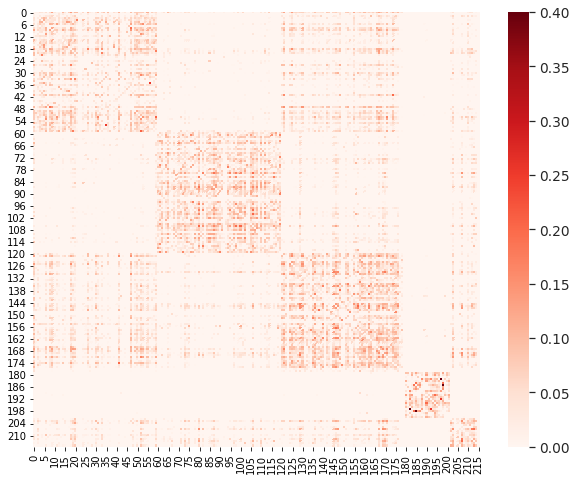

In [34]:
# 7. Sort similarity matrix by clusters and visualize in heatmap:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8)) 
sns.set(font_scale = 1.25)
sort_indices = np.argsort(c)
sorted_sim_mat = sim_mat[sort_indices, :][:, sort_indices]
sns.heatmap(sorted_sim_mat, cmap = 'Reds',vmin=0, vmax=0.4)

# 12 Create a Market Structure Map for the U.S. Digital Sector 2019

- We will use t-SNE to generate a 2D market structure map (i.e., reduce the dimensionality of the data to 2 dimensions: x and y)
- Although t-SNE commonly operates on feature vectors, you can also provide it with a distance matrix.
- To create a distance matrix, we simply invert all similarities: D = 1/S
- Because t-SNE can suffer from local optima, we run it multiple time with differently random seeds and pick the best solution in terms of t-SNE's cost function (i.e., minimize KL divergence)

In [42]:
# 1. Transform Similarity (note that this is a non-linear transformation: why?)
D = 1 / np.maximum(sim_mat, 1e-8) 

In [43]:
# 2. Import t-SNE from scikit-learn
from sklearn.manifold import TSNE

# 3. Set hyperparameter for perplexity
perp = 15  # perplexity of similarity kernel

# 4. Set multiple Seeds for random initializations (here, prime numbers)
np.random.RandomState(seed=0)
sds=[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
KL = []

# 5. Find best seed (i.e., lowest KL divergence) across multiple runs with different seeds. NOTE that we set metric to "precomputed" because we provide t-SNE with a distance matrix, not feature vectors!
for s in sds:
    tsne = TSNE(n_components = 2, metric = 'precomputed', perplexity = perp, init='random', learning_rate="auto", square_distances=True, random_state=s)
    X_tsne = tsne.fit_transform(D)
    KL.append(tsne.kl_divergence_)
    print(tsne.kl_divergence_, end=" ")

# 6. Now Fit Best Model (i.e., with the lowest KL divergence)
Y = TSNE(n_components = 2, metric = 'precomputed', perplexity = perp, init='random', learning_rate="auto", square_distances=True, random_state=sds[KL.index(min(KL))]).fit_transform(D)

# 7. Write t-SNE coordinates into Firms Dataframe
Firms['x'] = Y[:,0]
Firms['y'] = Y[:,1]
Firms

0.9715732336044312 0.973392903804779 0.9696267247200012 1.0261422395706177 1.0408217906951904 0.9721900224685669 1.0356712341308594 0.9916144609451294 0.9836362600326538 0.9751366972923279 

,name,gvkey,year,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI,Submarket,x,y,shortname
0,U S PHYSICAL THERAPY INC,25318,2019,8000,80,67.425,40.039,10.189,1460.8213,481.969,0.120094,0.573690,0.000000,0.081701,4,-21.944172,-1.806998,U S Physical Therapy
1,ARISTA NETWORKS INC,20748,2019,3576,35,805.774,859.867,15.751,15537.5226,2410.706,0.213185,0.034226,0.110568,0.288768,3,1.228835,-2.374682,Arista Networks
2,DANAHER CORP,3735,2019,3826,38,3362.400,3008.200,635.500,106745.3400,17911.100,0.058339,0.744154,0.018137,0.057367,4,-21.762629,-1.181842,Danaher
3,QUOTIENT TECHNOLOGY INC,19747,2019,7370,73,-22.694,-37.057,9.021,881.1981,436.160,-0.009494,0.643751,0.066014,-0.079578,1,-3.575091,5.921206,Quotient Technology
4,II-VI INC,14561,2019,3827,38,168.068,107.517,137.122,2329.3107,1362.496,0.102306,0.433599,0.071228,0.067210,2,16.327038,-2.458187,Ii-Vi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,SYNAPTICS INC,142814,2019,3674,36,20.900,-22.900,23.700,971.8190,1472.200,0.061782,0.712460,0.241949,-0.020345,2,10.206253,1.395591,Synaptics
212,A10 NETWORKS INC,19849,2019,3576,35,-15.630,-17.819,4.340,532.9746,212.628,-0.041667,0.304770,0.225591,-0.130224,3,0.251975,-1.816151,A10 Networks
213,AT&T INC,9899,2019,4812,48,31069.000,13903.000,19635.000,283508.0094,181265.000,0.078293,1.022696,0.002313,0.037070,5,2.644046,1.889583,At&T
214,FACTSET RESEARCH SYSTEMS INC,63172,2019,7370,73,438.035,352.790,59.370,10371.5266,1435.351,0.264907,0.854100,0.137617,0.283040,1,3.722746,7.213152,Factset Research Systems


## 12.1 Prepare Visualization

The firm names in the Computstat database are all capitalized and lengthy because of suffixes like "INC" or "CORP". 

To make our map more readable, we change the capitalization of the firm names and remove common suffixes.

In [44]:
# 1. Capitalize Firms in Title Style and remove unnecessary suffixes
banned = ['INC', 'PLC', 'CO', 'CORP', 'NV', 'TRUST', 'TR', 'LTD', '-CL A', 'SVCS']
f = lambda x: ' '.join([item for item in x.split() if item not in banned]).title()
Firms["shortname"] = Firms["name"].apply(f)
Firms["shortname"] = Firms["shortname"].str.replace(".Com", "", regex=True)
Firms.tail(5)

,name,gvkey,year,sic,sic2,ebit,ni,capx,mkvalt,sale,cashflow,liquidity,RD_Intensity,ROI,Submarket,x,y,shortname
211,SYNAPTICS INC,142814,2019,3674,36,20.900,-22.900,23.700,971.8190,1472.200,0.061782,0.712460,0.241949,-0.020345,2,10.206253,1.395591,Synaptics
212,A10 NETWORKS INC,19849,2019,3576,35,-15.630,-17.819,4.340,532.9746,212.628,-0.041667,0.304770,0.225591,-0.130224,3,0.251975,-1.816151,A10 Networks
213,AT&T INC,9899,2019,4812,48,31069.000,13903.000,19635.000,283508.0094,181265.000,0.078293,1.022696,0.002313,0.037070,5,2.644046,1.889583,At&T
214,FACTSET RESEARCH SYSTEMS INC,63172,2019,7370,73,438.035,352.790,59.370,10371.5266,1435.351,0.264907,0.854100,0.137617,0.283040,1,3.722746,7.213152,Factset Research Systems
215,ATOMERA INC,27737,2019,3674,36,-13.625,-13.300,0.051,52.7204,0.533,-0.869816,0.011037,0.508399,-0.965728,2,13.501678,2.304184,Atomera


## 12.2 Create Interactive Map with Altair

Powerful Tool for interactive Visualization in Python
https://altair-viz.github.io/index.html

- Zoom
- Tooltips
- Save to file (e.g., png)

In [45]:
# Install altair on your computer (already available on CoLab)
#!pip3 install altair

In [46]:
# 1. Import altair package
import altair as alt

# 2. Define the points (i.e., firms) for our map in terms of:
#    - location (x,y coordinates from t-SNE)
#    - colors (submarkets from community detection)
#    - and firm properties (from Compustat data)
# Note that we refer to the column names of our Firms DataFrame

points = alt.Chart(Firms).mark_circle().encode(
    alt.X('x', axis=None, scale=alt.Scale(zero=False)),                         # x coordinate on map
    alt.Y('y', axis=None, scale=alt.Scale(zero=False, padding=1)),              # y coordinate on map
    color='Submarket:N',                                                        # submarket - :N tells altair to treat this a nominal value
    #color= 'sale',                                                             # if you set a continuous variable as the color, you get a heatmap
    tooltip=[alt.Tooltip('name', title='Firm Name'),                            # We can include a lot of information in the tooltips (mouseover pop-up)
             alt.Tooltip('Submarket', title='Submarket'),
             alt.Tooltip('mkvalt', title='Market Value (MM)', format = "$,.0f"),# the formats are d3 formats. Read more here: https://github.com/d3/d3-format
             alt.Tooltip('ebit', title='EBIT (MM)', format = "$,.0f"),
             alt.Tooltip('sale', title='Revenue (MM)', format = "$,.0f"),
             alt.Tooltip('ROI', title='Return on Investment', format = ".2%"),
             alt.Tooltip('RD_Intensity', title='R&D Intensity', format = ".2%")
            ]
     )
# 3. Define how big firms' "Bubbles" on the map should be. 
#    We want to relate bubble size to Market Value, but we could define any other metric from our Firms DataFrame here
#    Note that we re-scale Market Value (using square root) because the differences can otherwise be too large which makes our map hard to read
bubbles = points.encode(
        alt.Size('mkvalt', scale=alt.Scale(type='sqrt'),title='Market Value (MM)'),
        )

# 4. Although we could label each bubble with the same label style (for firm name), 
#    we want to emphasize the "big players" in our map. 
#    Therefore, we make label size also depend on Market Value (or any other metric that we choose)
text = points.mark_text(
    align='left',       # how to align text to bubble
    baseline='middle',
    dx=5                # offset of label to bubble
).encode(
    alt.Size('mkvalt', legend=None, scale=alt.Scale(type='sqrt', range=[7,20])),  # tell altair not to put it in the legend, and use sqroot on Market Value again
    text='shortname',  # where in our Firms DataFrame (i.e., column) the text is that should be used as label
    )

# 5. Layer text on bubbles and make interactive
alt.layer(bubbles,text).resolve_scale(
    size='independent'  # tell altair not to harmonize the two notions of size (for text and bubbles).
).configure_axis(
    grid=False
).interactive().properties(height=800,width=800,title='Competitive Market Structure of the U.S. Digital Sector in 2019 based on TNIC Data')   # define size of map and title

alt.LayerChart(...)

##12.3 Map Quality

- How to determine **quality of map**?
  - ***Supervised Learning***: Ground truth is known. How?
  - What about ***Unsupervised Learning***?


In [47]:
## Let's define a function for map quality

# 1. Import some handy libraries
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# 2. Define function to calculate nearest-neighbor hit-rate
def calc_nn_hitrate(D, Y, n_neighbors = 10, Incs = None, input_type = 'similarity'):
    """ Calculate the Hit-Rate for nearest-neighbor-preservation for a mapping-solution of the input data.
    
    Arguments:
        D {nd.array} -- (n,n) Input: symmetric matrix, either distances or similarities (i.e., ground truth)
        Y {nd.array} -- (n,2) Output: array of map coordinates (i.e., model estimation = map projection = dimensionality reduction)
       
    Keyword Arguments:
        n_neighbors {int} -- number of neighbors to consider (default: 10)
        Incs {array} -- (n,) array of 0 or 1, indicating if objects should not be excluded in the calculation (0). If None is provided, all objects are included. 
        input_type {str} -- either 'similarity' or 'distance' (default: {'similarity'})
    """
    
    # 2a. Initialize
    hit_rate = 0
    n_samples = D.shape[0]
    D = D.copy()
    if not Incs is None:
        Y = Y[Incs==1, :]
        D = D[Incs==1, :][:, Incs == 1]
    
    # 2b. Create Distances from map coordinates
    Dist_map = squareform(pdist(Y, "sqeuclidean"))
    
    # 2c. Make diagonal (self-distances) larger than any other distance (thereby, an object never appears as its own nearest neighbor)
    np.fill_diagonal(Dist_map, np.max(Dist_map)+999)
    
    # 2d. Calculate hit-rate if distances are supplied as ground truth
    if input_type == 'distance':
        np.fill_diagonal(D, np.max(D)+999)
        for i in range(n_samples):
            # Sort i-th row of distance matrix (low-to-high)
            nn_data = np.argsort(D[i,:])[:n_neighbors] 
            nn_map = np.argsort(Dist_map[i, :])[:n_neighbors]
            nn_intersec = [id for id in nn_data if id in nn_map]
            hit_rate +=  len(nn_intersec)
        hit_rate = hit_rate / (n_neighbors * n_samples)
    elif input_type == 'similarity':
        
        # 2e. Calcualte based on similarities: 
        # For similarities, make diagonal (= self similarities) smaller than any other similarity (see above)
        np.fill_diagonal(D, 0)
        for i in range(n_samples):
        # Find max
            nn_data = np.argsort(D[i,:])[-n_neighbors:]
            nn_map = np.argsort(Dist_map[i, :])[:n_neighbors]
            nn_intersec = [id for id in nn_data if id in nn_map]
            hit_rate +=  len(nn_intersec)
        hit_rate = hit_rate / (n_neighbors * n_samples)
    else:
        print("Wrong input type!")
        return -1
    return hit_rate
   

In [48]:
# 3. Call function to get hit-rate!
calc_nn_hitrate(D, Y, n_neighbors = 10, input_type = 'distance')  

0.5449074074074074

# **Looking Ahead:**  

#### Thursday, February 16, 2023  Team Assignment 2 presentations

- Submission ***before noon*** on 02/16 on Canvas:
  1. Python Notebook with ALL analyses and processing
  2. PowerPoint Presentation
  3. Link to Video Recording of presentation (or Video if less than 50MB)
- Four Teams will present (notified on Sunday) - 10 Minute Presentation, 5 Minute Q&A

**All students must attend and submit peer evaluation forms**

**Read before class:** Ringel, Daniel M, 2022. [Multimarket membership mapping](https://journals.sagepub.com/doi/full/10.1177/00222437221110460). Journal of Marketing Research

----
  
####**Upcoming Online Quiz 2 on Unsupervised Learning** 
- Pertains to Classes 7-1 and to Assigned Readings in part II of this course   
- Opens 02/16 at 9pm and is due on 02/19 before midnight
----

***Sources:***  

*Balducci, B., & Marinova, D. (2018). Unstructured data in marketing. ***Journal of the Academy of Marketing Science***, 1-34.*

*Carpenter, Gregory S and Donald R Lehmann (1985), "A Model of Marketing Mix, Brand Switching, and Competition," ***Journal of Marketing Research***, 22 (3), 318-29.*

*DeSarbo, Wayne S., Rajdeep Grewal, and Jerry Wind (2006), "Who Competes with Whom? A Demand-Based Perspective for Identifying and Representing Asymmetric Competition," ***Strategic Management Journal***, 27 (2), 101-29.*

*Lattin, James M and Leigh McAlister (1985), "Using a Variety-Seeking Model to Identify Substitute and Complementary Relationships among Competing Products," ***Journal of Marketing Research***, 22 (3), 330-39.*

*Rao, Vithala R and Darius J Sabavala (1986), Measurement and Use of Market Response Functions for Allocating Marketing Resources. Boston: ***Marketing Science Institute***.*  
